# Les Misé<i>graph</i>les 

**Soziale Netzwerkanalyse**

- Hausaufgabe im Seminar _Computational Literacy Studies_ 
- Sommersemester 2018
- Abgabe: Julia Suter

### Daten laden und Graphen darstellen

**Frage**: Wie wurden diese Daten erstellt? Was bedeutet eine Verbindung im Graphen zwischen zwei Charakteren? Dass sie zusammen in einer Szene oder einem Dialog vorkommen?

Ich fand es sehr schwierig, die Graphen und Metriken zu interpretieren, ohne zu wissen, auf welche Weise entschieden wurde, ob zwei Charaktere miteinander verbunden sind oder nicht. Zum Beispiel sind die Knoten von Fantine und Cosette nicht verbunden, obwohl sie Mutter und Tochter sind - und im Buch sehr wohl eine Beziehung zueinander haben.

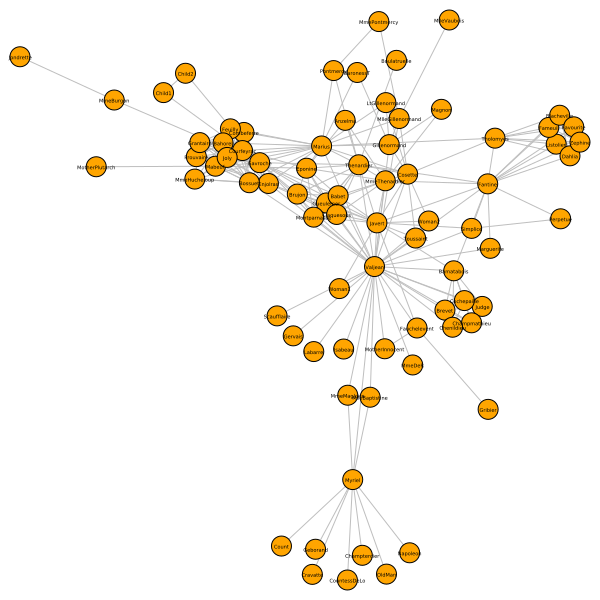

In [1]:
# Import igraph
import igraph as ig

# Load "Les Misérables" data
g = ig.Graph.Read_GML("./lesmiserables.gml")

# Choose layout
layout = g.layout("fr") 

# Plot
ig.plot(g,layout=layout, vertex_color="orange",
     vertex_label_size=5, vertex_size=20, edge_color='gray')

### Netzwerk Attribute

Die beiden Attribute sind _id_ und _label_. In _label_ sind die Namen der Charaktere gespeichert. Wenn die Namen im Attribut _name_ speichert werden, kann man jedoch viel einfacher auf die Knoten zugreifen.

In [2]:
# Get all attributes
print('Network attributes:')
print(g.vs.attribute_names())

# Save character names in "name"
for v in g.vs:
    v["name"] = v["label"]
    
# Get all attributes
print('\nNetwork attributes (again):')
print(g.vs.attribute_names())

Network attributes:
['id', 'label']

Network attributes (again):
['id', 'label', 'name']


In [3]:
# Print all character names
char_names = g.vs["name"]
print(char_names)

['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup']


### Hauptfigur _Jean Valjean_

Jean Valjean ist die Hauptfigur von _Les Misérables_ und hat auch die meisten Verknüpfungen zu anderen Figuren. Im Graphen sieht man dies anhand der Degree Centrality. Hauptfiguren weisen häufig einen hohen Degree auf, weil sie im Zentrum stehen und mit vielen anderen Charakteren verknüpft sind.

In diesem Fall hat Jean Valjean einen Degree von 36. Das bedeutet, dass er mit 36 anderen Charaktere in direkter Linie verbunden ist.

In [4]:
# Get main character node
main_char = g.vs.find('Valjean')

# Note: without the name attribute, one would have to call
# main_char = g.vs.find(label='Valjean')

# Another way of finding the main character:
highest_degree_char = g.vs.select(_degree = g.maxdegree())[0]

print('Main character has highest degree?'),
print(main_char == highest_degree_char)

# Degree for Jean Valjean
print('Degree:', g.degree('Valjean'))

Main character has highest degree?
True
Degree: 36


### Weitere Graph-Metriken


In [5]:
# Import pandas
import pandas as pd
from IPython.display import display, HTML


# Metric dict for saving results
metrics_dict = {}

def get_metrics_for_char(char_name):
    """Get connectedness to main character, degree, betweenness, closeness and eigenvector centrality
    for given character"""

    # Find character node
    char_v = g.vs.find(char_name)
    
    # Connected to main character?
    is_connected = g.are_connected(main_char, char_v)
    
    # Degree, betweenness, closeness, and eigenvector centrality
    degree = char_v.degree()
    betweenness = char_v.betweenness()
    closeness = char_v.closeness()
    eigenvector = g.evcent()[char_v.index]
    
    # Save metrics
    metrics_dict[char_name] = [is_connected, degree, betweenness, closeness, eigenvector]

# Get graph metrics for Jean Valjean
get_metrics_for_char('Valjean')    
    
# Define index names for table
index_names = ['Connection to main char','Degree','Closeness', 'Betweenness', 'Eigenvector']

# Load and display dataframe 
df = pd.DataFrame(data=metrics_dict, index=index_names)
df

,Valjean
Connection to main char,False
Degree,36
Closeness,1624.47
Betweenness,0.644068
Eigenvector,0.84195


### Weitere Charaktere und ihre Werte

In [6]:
# Get metrics for Javert and Eponine
get_metrics_for_char('Eponine')
get_metrics_for_char('Cosette')

# Load and display dataframe
df = pd.DataFrame(data=metrics_dict, index=index_names)
df

,Valjean,Eponine,Cosette
Connection to main char,False,False,True
Degree,36,11,11
Closeness,1624.47,32.7395,67.8193
Betweenness,0.644068,0.395833,0.477987
Eigenvector,0.84195,0.446558,0.34933


### Interpretation der Werte

Ich habe als zwei weitere Figuren _Cosette_ und _Éponine_ gewählt. Cosette ist Valjean's Ziehtochter. Épinone gehört eher zu Marius' Handlungsstrang, daher ist sie nicht direkt mit Valjean verknüpft. Ich habe die beiden Charaktere gewählt, weil sie beide weiblich, ungefähr im selben Alter und beide in Marius verliebt sind.

Valjean weist als Hauptfigur in allen 4 Centrality-Metriken die höchsten Werte auf. **Degree** misst, mit vielen anderen Charakteren Valjean verknüpft ist - und zwar mit mehr als dreimal so vielen wie Cosette und Éponine.
Die **Closeness Centrality** misst, wie nahe ein Knoten zu allen anderen Knoten im Graphen ist. Da Valjean die zentrale Figur in Les Misérables (und auch im Graphen) ist, überrascht es nicht, dass er eine sehr hohe Closeness aufweist - im Wert das Zwanzigfache von der Closessness Centrality von Cosette. **Betweenness Centrality** misst, wieviel Information durch einen bestimmten Knoten fliesst. Auch hier hat Valjean den höchsten Wert, wobei der Unterschied zu Cosette und Eponine in diesem Fall nicht so extrem ist. Die **Eigenvector Centrality** soll nicht nur berücksichtigen, wieviele Nachbarn ein Knoten hat, sondern auch wie wichtig diese sind. Valjean weist erneut den höchsten Wert auf, was nicht überraschend ist, da Valjean viele Verknüpfungen zu anderen Charakteren hat, die ebenfalls bedeutsam für die Geschichte sind.

Wenn man Cosette und Éponine vergleicht, fällt als erstes auf, dass Cosette eine direkte Verbindung zu Valjean hat - und Éponine nicht. Die beiden haben denselben **Degree**, was auf den ersten Blick erstaunlich wirkt, da Cosette eine der Hauptfiguren ist (das zweite Buch heisst sogar 'Cosette'), während Éponine nur eine Nebenfigur darstellt. Die niedrige Degree von Cosette hat vermutlich damit zu tun, dass Valjean sie sehr behütet und sie zeitweise versteckt hält, um sie zu beschützen. Daher kommt sie nur mit wenigen Leuten in Kontakt. Éponine hingegen gewinnt allein durch ihre Familie einige direkte Verbindungen im Graphen (Mutter, Vater, Schwester Azelma, Bruder Gavroche...). Cosette hat im Graphen merkwürdigerweise keine direkte Verbindung zu ihrer Mutter Fantine. Auch hat Cosette keine Verbindung zu Éponine, obwohl Cosette als Kind eine Weile lang im Hause der Thénardier gelebt hat und sie von Éponine gequält wurde. (Daher nochmals: Wie genau wurde der Graph erstellt?)

Die **Closeness Centrality** ist bei Cosette deutlich höher, was dadurch zu erklären ist, dass sie eine zentrale Figur im Buch ist und dadurch auch eine zentrale Position im Graphen einnimmt. Die **Betweenness Centrality** ist bei Cosette ebenfalls höher, was bedeutet, dass mehr Information durch ihren Knoten fliesst bzw. dass er auf dem "Weg" zwischen vielen Knotenpaaren liegt. 

Die **Eigenvector Centrality** ist bei Éponine hingegen höher, was ich erstaunlich finde, da meiner Empfindung nach Cosette mit mehr wichtigen Charakteren (Valjean, Javert, Fantine) zu tun hat als Éponine. Vielleicht hat die Verbindung zum gut verknüpften und wichtigen Gavroche die Eigenvector Centrality von Éponine stark erhöht.

### Grösste geodätische Distanz

Die geodätische Distanz ist der kürzeste Pfad zwischen zwei Knoten. Um die Figuren mit der grössten Distanz zur Hauptfigur zu finden, muss man erst alle kürzsten Pfade von jedem Charakter zur Hautpfigur Valjean bestimmen und dann diejenigen mit der maximalen Distanz extrahieren.
In unserem Graphen haben die Figure _Jondrette_ und _MotherPlutarch_ die grösste geodätische Distanz zu Jean Valjean  - und zwar die Distanz 3.

Wenn man diese Aufgabe nicht "mathematisch" lösen möchte, kann man diese Information auch aus der Visualisierung des Graphen entnehmen: Wenn man den Graphen als Baumstruktur darstellt (siehe unten), kann man die Charaktere mit grössten deodätischen Distanz einfach ablesen (hier hell-gelb eingefärbt).

**Anmerkung**: Leider weiss ich nicht, wer genau mit _Jondrette_ gemeint ist. Jondrette ist der Deckname, den die Familie Thénardier verwendet. Allerdings haben alle Familienmitglieder der Thénardier bereits Knoten im Graphen, daher ist mir nicht klar, wen der Knoten _Jondrette_ darstellen soll. 

In [7]:
# Get shortest path/geodesic distance for each node to main character
geodesic_distances = g.shortest_paths_dijkstra(source=main_char)[0]

# Longest shortest path/geodesic distance to main character
longest_geodesic_dist = max(geodesic_distances)

# Indices for nodes with longes geodesic path to main character
longest_geodesic_dist_node_indices = [i for i, geodesic_dist 
                                      in enumerate(geodesic_distances) 
                                      if geodesic_dist
                                      == longest_geodesic_dist]

# Print character names with longest geodesic distance
print(g.vs.select(longest_geodesic_dist_node_indices)["name"])

['Jondrette', 'MotherPlutarch']


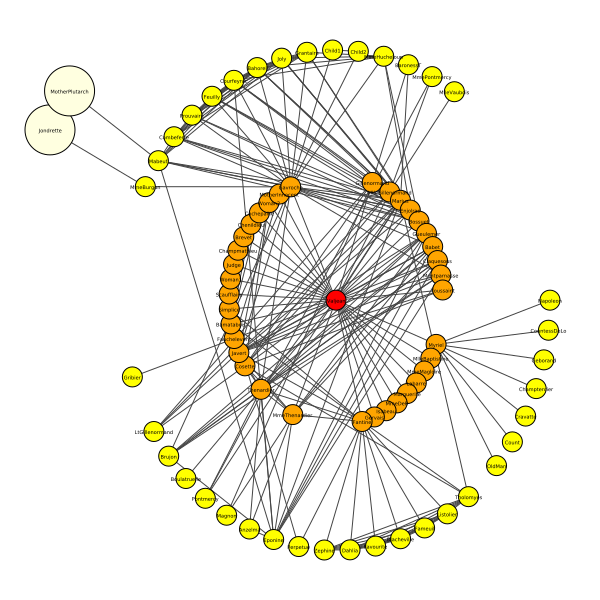

In [8]:
# Choose layout
layout = g.layout("rt_circular") 

# Size and color dict 
size_dict = {0:20, 1:20, 2:20, 3:50}
color_dict = {0:'red',1:'orange',2:'yellow',3:'lightyellow'}

# Set visual style
visual_style = {'vertex_size' : [size_dict[dist] for dist in geodesic_distances],
                'vertex_color': [color_dict[dist] for dist in geodesic_distances]}

# Plot
ig.plot(g, layout=layout,  vertex_label_size=5, margin=50, **visual_style)

### Netzwerk Eigenschaften

In [9]:
# Row names 
row_names =   ['Denstity','Clustering coefficient',
               'Average path length', 'Size of largest clique', 
               'Largest clique (1)', 'Largest clique (2)']

# Get graph metrics
metrics = [g.density(), g.transitivity_undirected(),
           g.average_path_length(directed=False), g.clique_number()] 

# Get names from largest cliques
for clique in g.largest_cliques():    
    metrics.append(sorted(g.vs.select(clique)["name"]))

# Set dataframe
df = pd.DataFrame(data=metrics, index=row_names, columns = ['Metrics and results'])

# Display
with pd.option_context('display.max_colwidth', 100):
    display(df)

,Metrics and results
Denstity,0.0868079
Clustering coefficient,0.498932
Average path length,2.64115
Size of largest clique,10
Largest clique (1),"[Bahorel, Bossuet, Combeferre, Courfeyrac, Enjolras, Feuilly, Gavroche, Grantaire, Joly, Prouvaire]"
Largest clique (2),"[Bahorel, Bossuet, Combeferre, Courfeyrac, Enjolras, Feuilly, Gavroche, Joly, Mabeuf, Marius]"


### Die grösste Clique

Die zwei grössen Cliquen haben jeweils 10 Mitglieder. 8 davon sind in beiden Cliquen identisch, nur die beiden Paare _Grantaire_ und _Prouvaire_ bzw. _Mabeuf_ und _Marius_ sind vertauscht. Die Mitglieder dieser Gruppen gehören zu den _Les Amis de l'ABC_ (Rebellengruppe). 

In Min & Park (2016), Fig. 3 findet man eine ähnliche ABC-Clique, nämlich Community VI, bestehend aus: Gavroche, Prouvaire, Joly, Combeferre, Granataire, Feuilly, Courfeyrac, Enjolras, Mabeuf, Hucheloup und Bahorel. Marius gehört in diesem Graphen nicht zur Clique der ABC, obwohl er eindeutig ein Mitglied ist. Bossuet fehlt im Graphen von Min & Park (2016), wobei es auch sein kann, dass er einfach unter einem anderen Spitznamen aufgelistet ist, den ich ihm nicht zuordnen konnte. Hucheloup hingegen kommt in unserem Graphen (insgesamt) nicht vor. Es gibt allerdings Mme Houchloup, aber ich weiss nicht, ob das diesselbe Person darstellen soll.

### Verbesserte Visualisierung

#### Radius proportional zu Degree
Wie vorgeschlagen habe ich den Radius proportional zum Degree gesetzt, damit wichtigere (stark vernetzte) Charaktere einen grösseren Knoten bekommen und dadurch besser erkennbar werden im Graphen.


#### Farbe als Kennzeichen für Distanz zur Hauptfigur

Wie bereits in der Aufgabe zur Bestimmung der geodätischen Distanz demonstriert, habe ich die Knoten entsprechend ihrer Distanz zu Valjean verschieden eingefärbt. Valjean erhält mit einer Distanz von 0 die Farbe Rot, direkte Verbindungen wie Javert werden orange eingefärbt, Charaktere mit einer Distanz von 2 wie Mabeuf sind gelb - und die zwei entferntesten Charaktere mit einer Distanz von 3 werden hellgelb eingefärbt.

#### Kantenbreite proportional zu Edge Betweenness

Genauso wie die Node Betweenness misst die Edge Betweenness, wie viel Information durch eine Kante fliesst bzw. wie häufig sie auf dem Weg von einem Knoten zum anderen passiert wird. Ich habe die Kantenbreite proportional zur Edge Betweenness gesetzt, damit man erkennt, welche Verbindungen besonders relevant sind. Zum Beispiel ist die Kante zwischen Valjean und Myriel äusserst stark, da es 7 Figuren gibt, die einzig über Myriel mit dem restlichen Graphen verbunden sind und daher fast in jedem Fall die Kante Myriel-Valjean überquert werden muss, um zu den anderen Knoten zu gelangen. Ähnlich, aber nicht ganz so ausgeprägt, verhält es sich mit Knotenpaaren Valjean-Fantine und Valjean-Gavroche.


#### Knoten-Form als Kennzeichen für Verbindung zu Thénardier

Als letzte Visualisierungsverbesserung habe ich die Knoten-Form angepasst. Alle Charaktere, die in direkter Linie mit Monsieur Thénardier zu tun haben (inkl. Thénardier selbst) erhalten einen quadratische Umrahmung des Knotens. Alle anderen behalten die gewohnte Kreisform. Interessanterweise sind quadratischen Knoten allesamt in der Mitte des Graphen, was bedeuten muss, dass Figuren, die mit Thénardier verbunden sind, alle relativ zentral sind. Eine Ausnahme stellt zum Beispiel Éponines Schwester Alzelma dar.

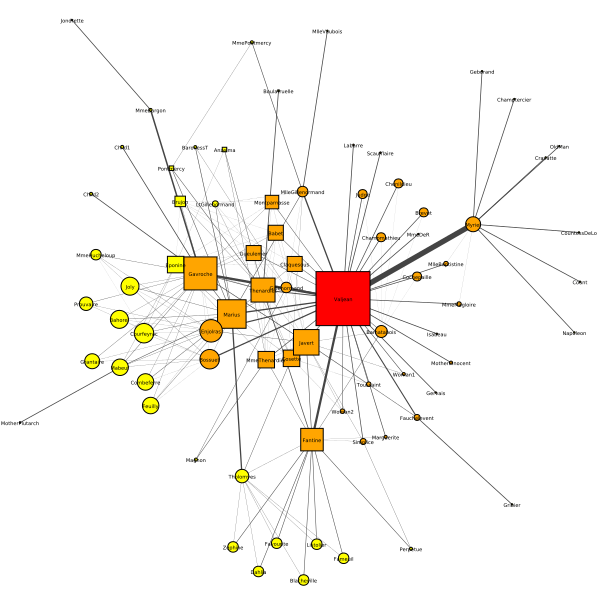

In [28]:
# Dicts for color and shape
color_dict = {0:'red',1:'orange',2:'yellow',3:'lightyellow'}
shape_dict = {True:'rectangle', False:'circle'}
visual_style = {}

# Get Thenardier node
thenardier_node = g.vs.find('Thenardier')
    
# Vertex size given by degree
visual_style["vertex_size"] = [v*1.5 for v in g.degree()]

# Vertex color by geodesic distance to main character Jean Valjean
visual_style["vertex_color"] = [color_dict[dist] for dist in geodesic_distances]

# Edge width by edge betweenness
visual_style['edge_width'] = [edge_betw/100 for edge_betw in g.edge_betweenness()]

# Vertex shape by connectedness to Thenardier
visual_style['vertex_shape'] = [shape_dict[g.are_connected(thenardier_node, node) or node["name"] == 'Thenardier'] 
                                for node in g.vs]

# Choose layout
layout = g.layout("kk") 

# Save plot
ig.plot(g, "miserables_network.pdf", **visual_style)

# Plot
ig.plot(g, layout=layout, vertex_label_size=5,
     **visual_style)

### Clustering

Python-igraph stellt verschiedene Clustering-Methoden zur Verfügung, die im [Manual](http://igraph.org/python/doc/igraph.GraphBase-class.html) beschrieben werden.
Ich habe mich für _community multilevel_ entschieden (_"finds the community structure of the graph according to the multilevel algorithm of Blondel et al."_). Das Infomap Cluster kann als Argument beim Plotten des Graphen mitgegeben werden, wodurch die Knoten entsprechend ihrer Clusterzugehörigkeit farblich gekennzeichnet werden.

Der <font color='blue'>blaue Cluster</font> beinhaltet Valjean und viele seiner Kontakte, die nichts mit den Thénardier, Marius und den Rebellen zu tun haben, vermutlich Menschen aus seiner Zeit als Bürgermeister und als er sich mit Cosette auf der Flucht befand und sich schliesslich in einem Kloster niederliess. Valjean ist in diesem Cluster die zentrale Figur, da er mit fast allen anderen Knoten direkt verbunden ist. Es gibt auch eine kleine Clique in diesem Cluster, die untereinander stark verbunden ist: Champmathieu, Judge, Cochepaille, Brevet, Chenildieu und Bamatabois. Champmathieu wurde wegen seiner Ähnlichkeit mit Valjean beinahe an seiner Stelle verurteilt, weshalb ich annehme, dass der Judge und die anderen Charaktere in dieser Clique ebenfalls zum Verhandlungsprozess gehören. 

Der <font color='red'>rote Cluster</font> beinhaltet Myriel und alle nur mir ihr verbundenen Charaktere, da diese sehr isoliert vom Rest des Graphen sind (wie bereits bei der Edge Betweenness erwähnt wurde). Myriel ist das einzige Verbindungsglied zwischen diesen Charakteren und den anderen.

Den <font color='lightgreen'>grünen Cluster</font> bilden Fantine und ihre Freudinnnen und Bekannten. Mit Fantine sind alle Charaktere im Cluster direkt verbunden. Eine Clique bilden Dahlia, Zéphine, and Favourite mit ihren Partnern Listolier, Fameuil, and Blacheville, sowie Fantines Partner Tholomyès (Vater von Cosette). Perpetue und Simplice sind Nonnen, die sich um Fantine kümmern.

Der <font color='magenta'> lila Cluster</font> beinhaltet wiederum _Les Amis de l'ABC_, die - wie bereits untersucht - sehr stark untereinander verknüpft sind, abgesehen von Child 1 und 2, Mme Burgon sowie Jondrette und MotherPlutarch, die wir bereits besprochen haben. Gavroche scheint in diesem Cluster die zentralste Figur zu sein. 

Der gelbe und hellblaue Cluster sind im Graphen stark vermischt und nicht so klar voneinander getrennt wie die anderen Cluster. Dies ist vielleicht Indiz dafür, dass man die darin enthaltenen Knoten nicht eindeutig zuordnen kann. Der <font color='cyan'>hellblaue Cluster</font> enthält Javert sowie die Thénardier als zentrale Figuren. Die Familie von Monsieur Thénardier ist ebenfalls darin enthalten, abgesehen von Gavroche. 

Der <font color='yellow'> gelbe Cluster</font> enthält das zentrale Liebespaar Cosette und Marius. Hinzu kommen Verwandte von Marius: die Pontmercy und Gillenormand. Die Charaktere in diesem Cluster scheinen untereinander weniger vernetzt zu sein als diejenigen im hellblauen.

Soweit ich das einschätzen kann, handelt es sich um mehr oder wenige sinnvolle Cluster, vor allem Fantine und ihre Freunde und Bekannte sowie _Les Amis de l'ABC_. Natürlich gehören Valjean, Javert und Cosette in gewisser Weise zusammen in ein Cluster, aber die Hauptfiguren anhand ihrer Beziehungen zu anderen Gruppierungen und Familien einzuteilen, finde ich eigentlich ganz elegant. 

Eine weitere Darstellung der Cluster ist ein Dendrogram, wie im unteren Beispiel mit der Methode _community walktrap_ demonstriert. Diese Darstellung ist meiner Meinung nach jedoch schwer zu lesen und zu interpretieren.

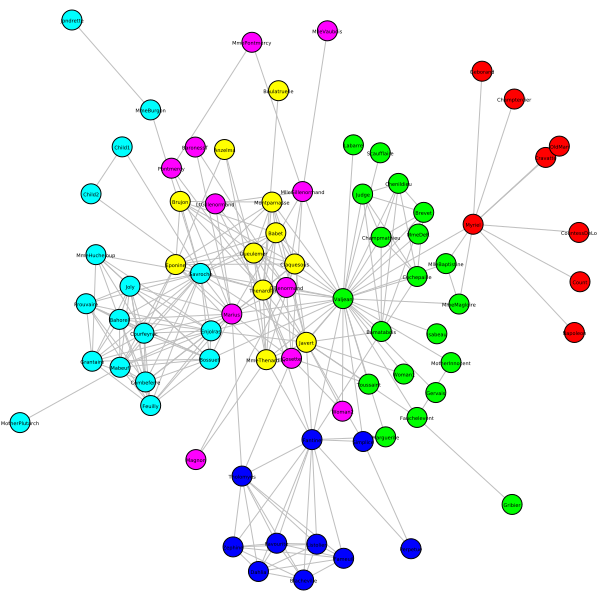

In [11]:
# Community multilevel clustering
infomap_cluster = g.community_multilevel()

# Plot
ig.plot(infomap_cluster, layout=layout,vertex_label_size=5,  
        edge_color='gray')

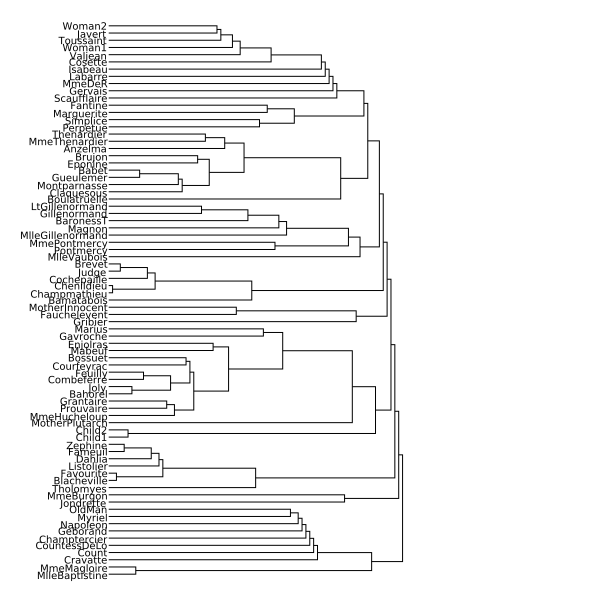

In [12]:
# Community walktrap clustering
infomap_cluster = g.community_walktrap()

# Plot
ig.plot(infomap_cluster,layout=layout,vertex_label_size=5,  
        edge_color='gray',)

### Welche Fragestellungen kann man damit bearbeiten?

- Welche Charaktere nehmen eine zentrale Rolle ein?
- Welche Charaktere sind (wie stark) miteinander verbunden?
- Welche Charaktere bilden Gruppen/Cliquen?
- Wie dicht ist der gesamte Graph? Sind alle Charaktere eng verbunden oder nicht?
- Ist es ein Small World/reguläres/random Netzwerk?
- Gibt es Charaktere/Cliquen, die nicht mit dem restlichen Charakteren verbunden sind? Welche Rolle nehmen sie in der Handlung ein?
- Wie unterscheiden sich die Graphen von verschiedenen Werken in diesen Punkten?
- Sind fiktive soziale Netzwerke mit realen zu vergleichen?

Min und Park (2016) haben den Graphen um weitere Informationen wie Sentiment Analyse und Topic Modelling erweitert. Ausserdem haben sie die zeitliche Komponente berücksichtigt. Damit kann man Fragestellungen untersuchen wie:

- Welche Charaktere werden wann in die Handlung eingeführt?
- Welche Charaktere haben mit welchem Teil der Handlung/welchen Themen zu tun?
- Welche Ereignisse beeinflussen den (dynamischen) Graphen besonders stark (z.B. Kriegsereignis)?
- Wie sieht der Graph zu Anfang und zu Ende der Handlung/des Kapitels aus?

- Welche Charaktere kommen in einem positiven Kontext mit anderen Charakteren vor? Wie gut kommen sie miteinander aus? Wer sind die Antagonisten?
- Welche Charaktereigenschaften kann man daraus ablesen? Wie verändern sich die Charaktere/Stimmung über die Handlung hinweg?
- Welche Cliquen befassen sich mit welchen Themen? Wie verändert sich die Zusammensetzung der Cliquen über die Zeit?
- Kann man das Sterben oder Verschwinden von Charakteren anhand des Graphen erkennen?
- Sind anhand des Graphen Vorhersagen über die nachfolgende Handlung möglich? 
- Welche Muster treten in welchen Genres/bei welchen Autoren besonders häufig auf? Z.B. Liebespaar trifft sich, verliebt sich, aber Vater ist dagegen, werden voneinander getrennt, finden am Ende wieder zusammen. Erkennt man dies im dynamischen Graphen?
- Was kann man in Bezug auf Spannungs-/Handlungsbögen ableiten? Kann man sie anhand des Graphen erkennen?

Wenn man den Text linguistisch analysiert und z.B. mit FrameNet verschiedene Aktionen zwischen Charakteren extrahiert (A tötet B), kann man die Kanten (d.h. die Verbindunden zwischen Charakteren) mit Aktionen beschriften.

- Welche Charaktere haben welche Beziehung zueinander? z.B. A liebt B, C liebt B, A tötet C, A heiratet B.
- Auch direkte und indirekte Relationen.
- Was sagt Graph allgemein über menschliche Beziehungen und Interaktionen aus?
- Könnte man damit Systeme trainieren, die Handlungen vorhersagen / selbst generieren?
- Sind wichtige Charaktere (relativ betrachtet) öfters linguistisches Subjekt im Satz als andere? Sind Nebenfiguren öfters Objekt? Bei welchen Verben ist das zutreffend? 
- Wie korrelieren Wichtigkeit im Graphen mit verschiedenen Text-Features?